In [3]:
from keras.layers import Flatten, Activation , Dense, AveragePooling2D , Dropout, Conv2D
from keras.models import Sequential
from utils import *
from keras.utils import plot_model

model = Sequential()
# ------------- start convolution layer ------------------
L = Conv2D(24,[4,4], data_format='channels_last', activation = 'relu', input_shape=(32,32,5))
model.add(L)


P = AveragePooling2D(pool_size=(2, 2), strides=1, padding='valid', data_format='channels_last')    
model.add(P)

L1 = Conv2D(6,[3,3], data_format='channels_last', activation = 'relu')
model.add(L1)

P1 = AveragePooling2D(pool_size=(2, 2), strides=1, padding='valid', data_format='channels_last')    
model.add(P1)


L2 = Conv2D(6,[3,3], data_format='channels_last', activation = 'relu')
model.add(L2)

P2 = AveragePooling2D(pool_size=(2, 2), strides=1, padding='valid', data_format='channels_last')    
model.add(P2)



L3 = Conv2D(2,[2,2], data_format='channels_last', activation = 'relu')
model.add(L3)

P3 = AveragePooling2D(pool_size=(2, 2), strides=1, padding='valid', data_format='channels_last')    
model.add(P3)
# -------------- start fully connected -------------------

model.add(Flatten())
model = model_nn(model, 20*20*2, 5, dropout=0.3, batch_normalization=True, activation='relu', neurons_decay=0, starting_power=1, l2=10**-5, compile_model=True, trainable=True)
model.compile(loss=rmse_loss_keras, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
#plot_model(model, to_file='model.png')
#print(model.output_shape)
print("Ok ....")

Ok ....


Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
Un objet de moins
-------------- Data loading ok -----------
     perte =  22
1237648702973673741
1237648702985404770
1237648702986518724
1237648702986912122
1237648702987632847
1237648703509233785
1237648703509758382
1237648703510413552
1237648703510413633
1237648703512117332
1237648703513428338
1237648703515066594
1237648703521030539
1237648704047022301
1237648704049578410
1237648704057704989
1237648704581599552
1237648704584614034
1237648704585072825
1237648704586121527
1237648704586645733
1237648704586646138

     number of images:  10202  class size : 10202
 -------- End -------
Train on 6121 samples, validate

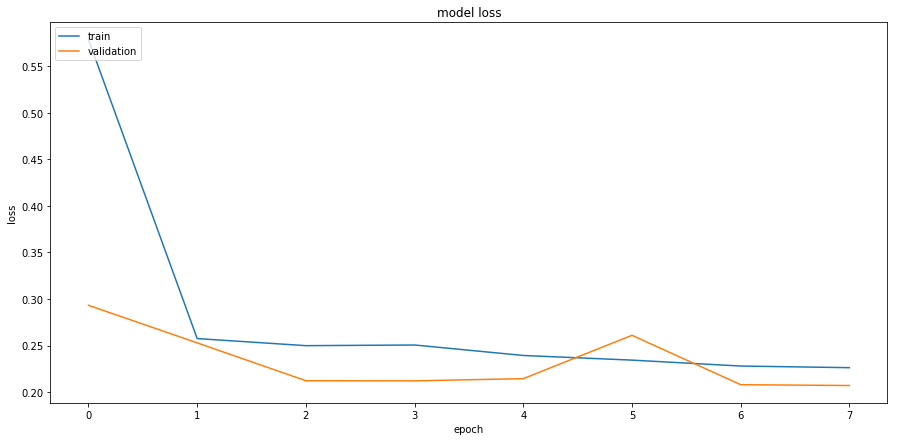

In [4]:
batch_size = 10#128
data = '../data/csvs/galaxies/all1_.csv';
dir_img = '../data/images/galaxies1/all'

X_Train, Y_Train, X_Test, Y_Test, X_Valid, Y_Valid = get_train_test_valid_data_galaxy(data,dir_img,test_size=0.4, valid_size = 0.5)

history = model.fit(X_Train, Y_Train, validation_data=(X_Valid, Y_Valid), epochs=8, batch_size=batch_size, verbose=1)

save_model(model, './model.json')

plot_history(history);


In [5]:
predict = model.predict(X_Test, batch_size=batch_size).reshape(-1)
result = compute_metrics(Y_Test, predict, 'Redshift')     
result

RMSE_znorm             0.162114
bias_znorm             0.155256
std_znorm              0.155256
RMSE                   0.240227
|znorm| > 0.15 (%)    45.343137
|znorm| > 3std (%)     0.000000
Name: Redshift, dtype: float64

In [2]:
#plot_quality(y_test, predict, object_class_test)

In [3]:
#dir_ = '../data/csvs/galaxies/'
#path1 = dir_+'all1.csv'
#path2 = dir_+'g.csv'
#comp = 0;
#with open(path1) as f:
#   with open(path2,'w') as p2:
 #       p2.write('')
  #  with open(path2,'a') as p2:
   #     for a in f.readlines():
    #        p2.write(a)
     #       if (comp == 2600):
      #          break;
       #     else:
        #        comp = comp + 1

In [4]:
#print(32*32*5)

In [5]:
#import os
#os.path.join('../data/object_images/', str(int(values['objid'])))
#print(os.path.join('../data/','aaa'))

In [18]:
def fact(n):
    try:
        n = int(n);
        if n<2:
            return 1
        else:
            return n*fact(n-1)
    except:
        print('not integer')
print(fact(8))

40320


In [20]:
b='1237648704586646138'
path = '../data/csvs/galaxies/all1.csv'
dest = '../data/csvs/galaxies/all1_1.csv'
v = False
with open(path,'r') as f:
    with open(dest,'a') as d:
        d.write(f.readline())
        for a in f.readlines():
            if v:
                d.write(a)
            if v or a.startswith(b):
                v = True